In [605]:
import yfinance as yf
import pandas as pd
import numpy as np

In [606]:

ticker = 'MSFT'
df = yf.download(ticker)
df.index = pd.to_datetime(df.index)
df.drop(columns="Adj Close", inplace=True)
df = df.droplevel('Ticker', axis=1)
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
1986-03-13 00:00:00+00:00,0.097222,0.101563,0.088542,0.088542,1031788800
1986-03-14 00:00:00+00:00,0.100694,0.102431,0.097222,0.097222,308160000
1986-03-17 00:00:00+00:00,0.102431,0.103299,0.100694,0.100694,133171200
1986-03-18 00:00:00+00:00,0.099826,0.103299,0.098958,0.102431,67766400
1986-03-19 00:00:00+00:00,0.098090,0.100694,0.097222,0.099826,47894400
...,...,...,...,...,...
2024-11-08 00:00:00+00:00,422.540009,426.500000,421.779999,425.320007,16891400
2024-11-11 00:00:00+00:00,418.010010,424.809998,416.000000,422.519989,24503300
2024-11-12 00:00:00+00:00,423.029999,424.440002,417.200012,418.250000,19401200


In [607]:
df["change_tomorrow"] = df["Close"].pct_change(-1)*100
df = df.dropna().copy()
df

Price,Close,High,Low,Open,Volume,change_tomorrow
Date,,,,,,
1986-03-13 00:00:00+00:00,0.097222,0.101563,0.088542,0.088542,1031788800,-3.448071
1986-03-14 00:00:00+00:00,0.100694,0.102431,0.097222,0.097222,308160000,-1.695774
1986-03-17 00:00:00+00:00,0.102431,0.103299,0.100694,0.100694,133171200,2.609539
1986-03-18 00:00:00+00:00,0.099826,0.103299,0.098958,0.102431,67766400,1.769803
1986-03-19 00:00:00+00:00,0.098090,0.100694,0.097222,0.099826,47894400,2.727102
...,...,...,...,...,...,...
2024-11-07 00:00:00+00:00,425.429993,426.850006,419.880005,421.279999,19901800,0.683955
2024-11-08 00:00:00+00:00,422.540009,426.500000,421.779999,425.320007,16891400,1.083706
2024-11-11 00:00:00+00:00,418.010010,424.809998,416.000000,422.519989,24503300,-1.186674


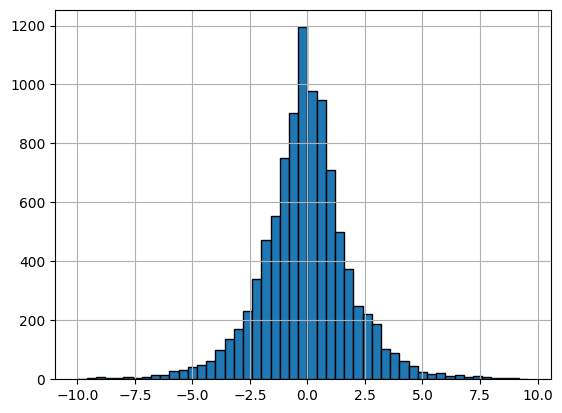

In [608]:
bins = np.arange(-10,10,.4)
df.change_tomorrow.hist(bins=bins, edgecolor='black');

In [609]:
df["change_tomorrow_direction"] = df.change_tomorrow.apply(lambda v: "UP" if v>0 else "DOWN")
df

Price,Close,High,Low,Open,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
1986-03-13 00:00:00+00:00,0.097222,0.101563,0.088542,0.088542,1031788800,-3.448071,DOWN
1986-03-14 00:00:00+00:00,0.100694,0.102431,0.097222,0.097222,308160000,-1.695774,DOWN
1986-03-17 00:00:00+00:00,0.102431,0.103299,0.100694,0.100694,133171200,2.609539,UP
1986-03-18 00:00:00+00:00,0.099826,0.103299,0.098958,0.102431,67766400,1.769803,UP
1986-03-19 00:00:00+00:00,0.098090,0.100694,0.097222,0.099826,47894400,2.727102,UP
...,...,...,...,...,...,...,...
2024-11-07 00:00:00+00:00,425.429993,426.850006,419.880005,421.279999,19901800,0.683955,UP
2024-11-08 00:00:00+00:00,422.540009,426.500000,421.779999,425.320007,16891400,1.083706,UP
2024-11-11 00:00:00+00:00,418.010010,424.809998,416.000000,422.519989,24503300,-1.186674,DOWN


In [610]:
dftrain = df.loc["2016-12-01":,:].copy().drop(columns=["change_tomorrow","change_tomorrow_direction"])
dftest =  df.loc["2023-01-01":,:].copy().drop(columns=["change_tomorrow","change_tomorrow_direction"])

In [611]:
ttrain = df.loc["2016-12-01":,"change_tomorrow_direction"].copy()
ttest  = df.loc["2023-01-01":,"change_tomorrow_direction"].copy()

In [612]:
ttrain

Date
2016-12-01 00:00:00+00:00    DOWN
2016-12-02 00:00:00+00:00    DOWN
2016-12-05 00:00:00+00:00      UP
2016-12-06 00:00:00+00:00    DOWN
2016-12-07 00:00:00+00:00      UP
                             ... 
2024-11-07 00:00:00+00:00      UP
2024-11-08 00:00:00+00:00      UP
2024-11-11 00:00:00+00:00    DOWN
2024-11-12 00:00:00+00:00    DOWN
2024-11-13 00:00:00+00:00    DOWN
Name: change_tomorrow_direction, Length: 2001, dtype: object

In [613]:
from sklearn.tree import DecisionTreeClassifier

In [614]:
model_dt = DecisionTreeClassifier(max_depth=4)
model_dt.fit(X=dftrain, y=ttrain)

DecisionTreeClassifier(max_depth=4)

In [615]:
from sklearn.tree import plot_tree
#plot_tree(decision_tree=model_dt);

In [616]:
ptrain = model_dt.predict(X=dftrain)
ptest = model_dt.predict(X=dftest)

In [617]:
Vtrain = (ptrain == ttrain).sum()/len(ptrain)
Vtest = (ptest == ttest).sum()/len(ptest)

In [618]:
print(f"Success rate train = {Vtrain}\nSuccess rate test  = {Vtest}")

Success rate train = 0.5797101449275363
Success rate test  = 0.5723404255319149


In [620]:
model_dt.score(dftest, ttest)

0.5723404255319149

In [621]:
from backtesting import Backtest, Strategy

In [622]:
already_bought = False
list_buy_sell = []
for d in ttrain:
    if d=='UP' and already_bought == False:
        list_buy_sell.append(1)
        already_bought = True
    elif d=='DOWN' and already_bought == True:
        list_buy_sell.append(-1)
        already_bought = False
    else:
        list_buy_sell.append(0)


In [623]:
dftrain['buy_sell_track']=list_buy_sell
dftrain

Price,Close,High,Low,Open,Volume,buy_sell_track
Date,,,,,,
2016-12-01 00:00:00+00:00,59.200001,60.150002,58.939999,60.110001,34542100,0
2016-12-02 00:00:00+00:00,59.250000,59.470001,58.799999,59.080002,25515700,0
2016-12-05 00:00:00+00:00,60.220001,60.590000,59.560001,59.700001,23552700,1
2016-12-06 00:00:00+00:00,59.950001,60.459999,59.799999,60.430000,19907000,-1
2016-12-07 00:00:00+00:00,61.369999,61.380001,59.799999,60.009998,30809000,1
...,...,...,...,...,...,...
2024-11-07 00:00:00+00:00,425.429993,426.850006,419.880005,421.279999,19901800,1
2024-11-08 00:00:00+00:00,422.540009,426.500000,421.779999,425.320007,16891400,0
2024-11-11 00:00:00+00:00,418.010010,424.809998,416.000000,422.519989,24503300,-1


In [624]:
class ClassificationUP(Strategy):
    def init(self):
        self.model = model_dt
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[[-1],:]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        # conditions to sell or buy
        if forecast_tomorrow == 'UP' and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow == 'DOWN' and self.already_bought == True:
            self.sell()
            self.already_bought = False 
        else:
            pass

In [625]:
df = pd.read_excel('data/microsoft-linkedin-processed.xlsx', index_col=0)
df.index = pd.to_datetime(df.index)
df_explanatory = df.drop(columns=["change_tomorrow","change_tomorrow_direction"])
df_explanatory

,Close,High,Low,Open,Volume
Price,,,,,
2016-12-01,59.200001,60.150002,58.939999,60.110001,34542100
2016-12-02,59.250000,59.470001,58.799999,59.080002,25515700
2016-12-05,60.220001,60.590000,59.560001,59.700001,23552700
2016-12-06,59.950001,60.459999,59.799999,60.430000,19907000
2016-12-07,61.369999,61.380001,59.799999,60.009998,30809000
...,...,...,...,...,...
2024-11-04,408.459991,410.420013,405.570007,409.799988,19672300
2024-11-05,411.459991,414.899994,408.079987,408.369995,17626000
2024-11-06,420.179993,420.450012,410.519989,412.420013,26681800


In [626]:
bt = Backtest(data=dftrain, strategy=ClassificationUP,
              cash=10000, commission=.002, exclusive_orders=True)

In [627]:
results = bt.run()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- buy_sell_track


In [580]:
results

Start                     2016-12-01 00:00:00
End                       2024-11-08 00:00:00
Duration                   2899 days 00:00:00
Exposure Time [%]                     99.8999
Equity Final [$]               6174802.726398
Equity Peak [$]                6188801.612161
Return [%]                       61648.027264
Buy & Hold Return [%]              613.750005
Return (Ann.) [%]                  124.890173
Volatility (Ann.) [%]               58.192021
Sharpe Ratio                         2.146173
Sortino Ratio                        8.205739
Calmar Ratio                         4.218852
Max. Drawdown [%]                  -29.602878
Avg. Drawdown [%]                   -2.104008
Max. Drawdown Duration      286 days 00:00:00
Avg. Drawdown Duration       11 days 00:00:00
# Trades                                  576
Win Rate [%]                        68.055556
Best Trade [%]                      13.806898
Worst Trade [%]                    -12.433073
Avg. Trade [%]                    

In [581]:
results.to_frame(name='Values').loc[:'Return [%]']

,Values
Start,2016-12-01 00:00:00
End,2024-11-08 00:00:00
Duration,2899 days 00:00:00
Exposure Time [%],99.8999
Equity Final [$],6174802.726398
Equity Peak [$],6188801.612161
Return [%],61648.027264
